# LSTM을 이용한 뉴스 카테고리 분류

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding

## GPU 설정

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

## 데이터 불러오기

In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

## 데이터 확인

In [4]:
category = np.max(y_train)+1
print(category, "카테코리")
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테코리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


## One-hot Encoding

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Modeling

In [6]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

## Padding

In [7]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

## Train

In [8]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=20, epochs=200, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 10s 15ms/step - loss: 2.2291 - accuracy: 0.4344 - val_loss: 1.8249 - val_accuracy: 0.5392
Epoch 2/200
450/450 [==============================] - 7s 15ms/step - loss: 1.7356 - accuracy: 0.5483 - val_loss: 1.7232 - val_accuracy: 0.5632
Epoch 3/200
450/450 [==============================] - 7s 15ms/step - loss: 1.5618 - accuracy: 0.5949 - val_loss: 1.5195 - val_accuracy: 0.6118
Epoch 4/200
450/450 [==============================] - 7s 15ms/step - loss: 1.4363 - accuracy: 0.6310 - val_loss: 1.4660 - val_accuracy: 0.6207
Epoch 5/200
450/450 [==============================] - 7s 15ms/step - loss: 1.3030 - accuracy: 0.6671 - val_loss: 1.3983 - val_accuracy: 0.6451
Epoch 6/200
450/450 [==============================] - 7s 15ms/step - loss: 1.1994 - accuracy: 0.6987 - val_loss: 1.3295 - val_accuracy: 0.6679
Epoch 7/200
450/450 [==============================] - 7s 15ms/step - loss: 1.1053 - accuracy: 0.7187 - val_loss: 1.2399 - val_accuracy

## Test

In [9]:
print("Test Accuracy: {:.4f}".format(model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 7ms/step - loss: 1.2876 - accuracy: 0.7275
Test Accuracy: 0.7275


## 시각화

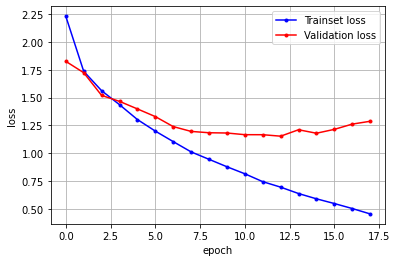

In [10]:
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset loss')
plt.plot(x_len, y_vloss, marker='.', c='red', label='Validation loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()